In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [3]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_datasets = load_diabetes()
print(diabetes_datasets['DESCR'])



.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [4]:
# Save the input and target variables
#print(diabetes_datasets.keys())
data =diabetes_datasets['data']
targets = diabetes_datasets['target']

In [5]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0))/targets.std()

targets


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)


(397, 10)
(45, 10)


#### Train a feedforward neural network model

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model
model = get_model()

In [8]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compile the model

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [10]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 0.9438 - mae: 0.8328 - val_loss: 0.9181 - val_mae: 0.8079
Epoch 2/100
337/337 - 0s - loss: 0.8566 - mae: 0.7933 - val_loss: 0.7180 - val_mae: 0.7175
Epoch 3/100
337/337 - 0s - loss: 0.6646 - mae: 0.6953 - val_loss: 0.4652 - val_mae: 0.5479
Epoch 4/100
337/337 - 0s - loss: 0.5561 - mae: 0.6021 - val_loss: 0.4362 - val_mae: 0.5394
Epoch 5/100
337/337 - 0s - loss: 0.4955 - mae: 0.5662 - val_loss: 0.4106 - val_mae: 0.5366
Epoch 6/100
337/337 - 0s - loss: 0.4945 - mae: 0.5668 - val_loss: 0.3723 - val_mae: 0.4894
Epoch 7/100
337/337 - 0s - loss: 0.4811 - mae: 0.5520 - val_loss: 0.3605 - val_mae: 0.4728
Epoch 8/100
337/337 - 0s - loss: 0.4803 - mae: 0.5456 - val_loss: 0.3652 - val_mae: 0.4987
Epoch 9/100
337/337 - 0s - loss: 0.4883 - mae: 0.5780 - val_loss: 0.3717 - val_mae: 0.5015
Epoch 10/100
337/337 - 0s - loss: 0.4549 - mae: 0.5469 - val_loss: 0.3676 - val_mae: 0.4911
Epoch 11/100
337/337 - 0s - loss: 0.4699 - m

In [11]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets,verbose=2)

45/1 - 0s - loss: 1.5562 - mae: 0.8565


[1.4257716443803576, 0.8565344]

#### Plot the learning curves

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

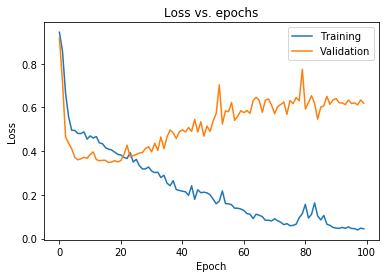

In [13]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [21]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [16]:
# Re-build the model with weight decay and dropout layers

model=get_regularised_model(1e-5, 0.3)

In [17]:
# Compile the model
model.compile(optimizer="adam", loss='mse', metrics=["mae"])

In [18]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data,train_targets,validation_split=0.15 , epochs=100,batch_size=64,verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0146 - mae: 0.8552 - val_loss: 0.9788 - val_mae: 0.8371
Epoch 2/100
337/337 - 0s - loss: 1.0002 - mae: 0.8503 - val_loss: 0.9470 - val_mae: 0.8233
Epoch 3/100
337/337 - 0s - loss: 0.9745 - mae: 0.8425 - val_loss: 0.8582 - val_mae: 0.7856
Epoch 4/100
337/337 - 0s - loss: 0.8654 - mae: 0.7995 - val_loss: 0.7002 - val_mae: 0.7102
Epoch 5/100
337/337 - 0s - loss: 0.7644 - mae: 0.7484 - val_loss: 0.5507 - val_mae: 0.6258
Epoch 6/100
337/337 - 0s - loss: 0.6333 - mae: 0.6575 - val_loss: 0.4816 - val_mae: 0.5626
Epoch 7/100
337/337 - 0s - loss: 0.6290 - mae: 0.6446 - val_loss: 0.4844 - val_mae: 0.5542
Epoch 8/100
337/337 - 0s - loss: 0.6045 - mae: 0.6216 - val_loss: 0.5150 - val_mae: 0.5466
Epoch 9/100
337/337 - 0s - loss: 0.5938 - mae: 0.6186 - val_loss: 0.4753 - val_mae: 0.5541
Epoch 10/100
337/337 - 0s - loss: 0.5401 - mae: 0.6034 - val_loss: 0.4614 - val_mae: 0.5344
Epoch 11/100
337/337 - 0s - loss: 0.5602 - m

In [19]:
# Evaluate the model on the test set
model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.5869 - mae: 0.6058


[0.6289261168903775, 0.60576284]

#### Plot the learning curves

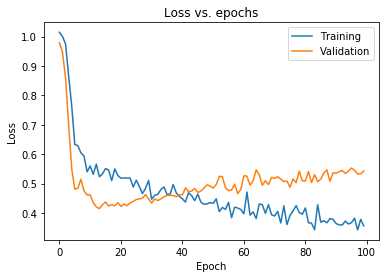

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [16]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class predictingCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("starting predecting ......")
    
   # def on_epoch_begin(self, epoch, logs=None):
           # print(f"starting epoch{epoch}")
    
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"test: Starting batch {batch}")
    
    def on_predict_batch_end(self, batch, logs=None):
        print(f"ttest: finished batch {batch}")
    
  #  def on_epoch_end(self, epoch, logs=None):
          #  print(f"finished epoch{epoch}")
    
    def on_predict_end(self, logs=None):
        print("finished predecting ......")
    

In [22]:
# Re-build the model
model=get_regularised_model(1e-5, 0.3)

In [23]:
# Compile the model
model.compile(optimizer="adam", loss="mse")


#### Train the model with the callback

In [26]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets,  epochs=3,  batch_size=128,verbose=2, validation_split=0.15)



Train on 337 samples, validate on 60 samples
Epoch 1/3
337/337 - 0s - loss: 0.9978 - val_loss: 0.9345
Epoch 2/3
337/337 - 0s - loss: 0.9674 - val_loss: 0.8826
Epoch 3/3
337/337 - 0s - loss: 0.9291 - val_loss: 0.8055


In [28]:
# Evaluate the model

model.evaluate(test_data,test_targets,verbose=2,callbacks=[TestingCallback()])

starting testing ......
test: Starting batch 0
ttest: finished batch 0
test: Starting batch 1
ttest: finished batch 1
45/1 - 0s - loss: 0.6136
finished testing ......


0.7922925465636783

In [30]:
# Make predictions with the model

model.predict(test_data,verbose=2,callbacks=[predictingCallback()])

starting predecting ......
test: Starting batch 0
ttest: finished batch 0
test: Starting batch 1
ttest: finished batch 1
45/1 - 0s
finished predecting ......


array([[-0.20015794],
       [ 0.10812788],
       [ 0.05109603],
       [ 0.05818227],
       [-0.22205491],
       [-0.30605188],
       [ 0.07365204],
       [-0.01056477],
       [ 0.08863381],
       [-0.284684  ],
       [ 0.109022  ],
       [-0.12705189],
       [ 0.12238701],
       [ 0.1161157 ],
       [ 0.09697258],
       [-0.32015845],
       [-0.31700027],
       [ 0.09725498],
       [-0.17022815],
       [ 0.08964396],
       [ 0.06366467],
       [-0.29445204],
       [ 0.00048639],
       [-0.33243507],
       [ 0.11046016],
       [-0.28976429],
       [ 0.00059629],
       [ 0.08803739],
       [-0.09109333],
       [-0.11860383],
       [-0.2113391 ],
       [ 0.10287982],
       [-0.34174654],
       [-0.00114401],
       [-0.184815  ],
       [ 0.08659374],
       [-0.09412032],
       [ 0.06894442],
       [-0.24045213],
       [-0.31625602],
       [-0.26839584],
       [-0.22042109],
       [-0.280349  ],
       [-0.3562369 ],
       [ 0.1061608 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [38]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer="adam", loss="mse")
unreg_history= unregularised_model.fit(train_data,train_targets,
                                               verbose=2,epochs=100,
                                               validation_split=0.15,
                                               batch_size=64,
                                               callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 0.9401 - val_loss: 0.9142
Epoch 2/100
337/337 - 0s - loss: 0.8639 - val_loss: 0.7607
Epoch 3/100
337/337 - 0s - loss: 0.6915 - val_loss: 0.5567
Epoch 4/100
337/337 - 0s - loss: 0.5639 - val_loss: 0.5320
Epoch 5/100
337/337 - 0s - loss: 0.5322 - val_loss: 0.4145
Epoch 6/100
337/337 - 0s - loss: 0.4988 - val_loss: 0.4033
Epoch 7/100
337/337 - 0s - loss: 0.4617 - val_loss: 0.4243
Epoch 8/100
337/337 - 0s - loss: 0.5076 - val_loss: 0.4208


In [39]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data,test_targets,verbose=2)

45/1 - 0s - loss: 0.8587


0.6379587915208604

In [40]:
# Re-train the regularised model
regularised_model=get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer="adam", loss="mse")
reg_history= regularised_model.fit(train_data,train_targets,
                                               verbose=2,epochs=100,
                                               validation_split=0.15,
                                               batch_size=64,
                                               callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 0.9461 - val_loss: 0.9478
Epoch 2/100
337/337 - 0s - loss: 0.9076 - val_loss: 0.8568
Epoch 3/100
337/337 - 0s - loss: 0.8139 - val_loss: 0.7074
Epoch 4/100
337/337 - 0s - loss: 0.6838 - val_loss: 0.6341
Epoch 5/100
337/337 - 0s - loss: 0.6459 - val_loss: 0.5605
Epoch 6/100
337/337 - 0s - loss: 0.5846 - val_loss: 0.4541
Epoch 7/100
337/337 - 0s - loss: 0.5344 - val_loss: 0.4205
Epoch 8/100
337/337 - 0s - loss: 0.5453 - val_loss: 0.4007
Epoch 9/100
337/337 - 0s - loss: 0.5175 - val_loss: 0.3968
Epoch 10/100
337/337 - 0s - loss: 0.5360 - val_loss: 0.3990
Epoch 11/100
337/337 - 0s - loss: 0.5060 - val_loss: 0.3857
Epoch 12/100
337/337 - 0s - loss: 0.4915 - val_loss: 0.3868
Epoch 13/100
337/337 - 0s - loss: 0.4835 - val_loss: 0.3956


In [41]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.8350


0.6470691363016764

#### Plot the learning curves

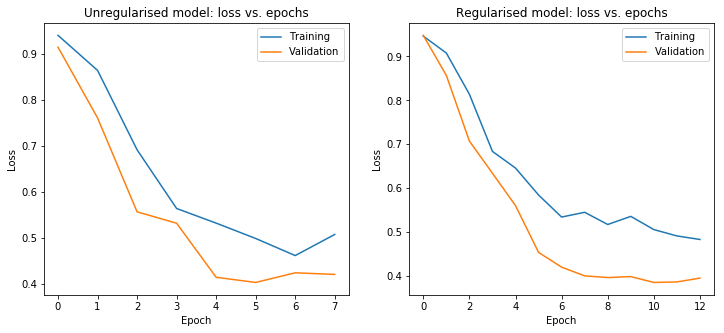

In [42]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()